<a href="https://colab.research.google.com/github/IRGO-CO/DeepLearning/blob/main/JessAI_0_0_2_BETA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **JessIA-0.0.2-BETA**
<details>
  <summary>Descrição</summary>
**PT -** Esta é a versão inicial da JessIA (JessIA-0.0.1-BETA), uma implementação de uma Rede Neural Recorrente (RNN) utilizando camadas LSTM para previsão de séries temporais financeiras. É importante notar que este código ainda está em estágio BETA, e sua organização pode não refletir as melhores práticas. Trata-se de um ponto de partida para o desenvolvimento da JessIA, destinado a fornecer uma base para futuras iterações e melhorias.

---
**EN -** This is the initial version of JessIA (JessIA-0.0.1-BETA), an implementation of a Recurrent Neural Network (RNN) using LSTM layers for financial time series prediction. It is essential to note that this code is in the BETA stage, and its organization may not reflect best practices. It serves as a starting point for JessIA development, intended to provide a foundation for future iterations and improvements.
</details>

###**Installation and Library Import**




In [1]:
!pip install tensorboard

In [2]:
!pip install pandas_ta

In [3]:
!pip install mplfinance

In [4]:
!pip install yfinance

In [5]:
import os
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.initializers import glorot_uniform, he_normal
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
import mplfinance as mpf
#import pandas_ta as ta

In [6]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Extract Data**
<details>
  <summary><strong>Function Documentation: <code>extract_data</code></strong></summary>

  <p>This function is designed to extract historical financial market data, either for training or testing purposes. It uses the Yahoo Finance API (yfinance) to download historical stock or forex data for a specified symbol, time range, and timeframe. The extracted data is then preprocessed by normalizing it using MinMaxScaler.</p>

  <h2>Parameters</h2>
  <ul>
    <li><code>d_type</code> (str, optional): Specifies the purpose of data extraction. Default is 'train'. Valid options are 'train' for training data and 'test' for testing data.</li>
    <li><code>start_date</code> (str, optional): Start date for data extraction in the format 'YYYY-MM-DD'. Default is an empty string, indicating the earliest available date.</li>
    <li><code>end_date</code> (str, optional): End date for data extraction in the format 'YYYY-MM-DD'. Default is an empty string, indicating the latest available date.</li>
    <li><code>symbol</code> (str, optional): The financial instrument symbol. Default is 'EURUSD=X'.</li>
    <li><code>timeframe</code> (str, optional): The timeframe for data, e.g., '1d' for daily data. Default is '1d'.</li>
  </ul>

  <h2>Returns</h2>
  <p><code>data</code> (pd.DataFrame): A pandas DataFrame containing the extracted and preprocessed financial market data. Columns include 'Open', 'High', 'Low', and 'Close'. If <code>d_type</code> is 'train', data for multiple symbols is concatenated.</p>

  <h2>Usage</h2>
  <pre>
    <code>
      # Example 1: Extract training data for multiple symbols
      train_data = extract_data(d_type='train', start_date='2023-01-01', end_date='2023-12-31', timeframe='1d')
      # Example 2: Extract testing data for a specific symbol
      test_data = extract_data(d_type='test', start_date='2024-01-01', end_date='2024-01-21', symbol='USDJPY=X', timeframe='1d')
    </code>
  </pre>

  <h2>Note</h2>
  <ul>
    <li>For training data extraction (<code>d_type='train'</code>), the function downloads data for a predefined list of symbols (<code>compilation</code>).</li>
    <li>The extracted data is normalized using MinMaxScaler with a feature range of (0, 1).</li>
    <li>Invalid <code>d_type</code> values will result in an error message indicating the valid options.</li>
  </ul>
</details>


In [7]:
def extract_data(d_type = 'train', start_date = '', end_date = '', symbol = 'EURUSD=X', timeframe = '1d'):
  if d_type == 'train':
    data = pd.DataFrame()
    compilation = ['EURUSD=X', 'AUDUSD=X', 'GBPUSD=X', 'USDJPY=X', 'USDCAD=X',
                   'USDCHF=X', 'NZDUSD=X', 'EURGBP=X', 'EURJPY=X', 'AUDJPY=X',
                   'GBPJPY=X', 'USDAUD=X', 'USDEUR=X', 'USDNZD=X', 'USDSEK=X']
    for par in compilation:
        dados = yf.download(par, start=start_date, end=end_date, interval = timeframe)[['Open', 'High', 'Low', 'Close']]
        data = pd.concat([data, dados])

  elif d_type == 'test':
    data = yf.download(symbol, start=start_date, end=end_date, interval = timeframe)[['Open', 'High', 'Low', 'Close']]
  else: return f'Invalid data type: {d_type} \n Valid options: "train" or "test"'
  data.reset_index(inplace=True)
  data = data.drop('Date', axis=1)
  normalizador = MinMaxScaler(feature_range=(0, 1))
  data = normalizador.fit_transform(data)
  return data

In [8]:
data_train_N = extract_data(d_type = 'train', start_date='2005-01-01', end_date='2020-12-1')
data_test_N = extract_data(d_type = 'test', start_date='2021-01-01', end_date='2023-12-1')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

### **Pré-processamento** | **Preprocessing**
<details>
  <summary>Descrição</summary>
  **PT -** Nesta etapa de pré-processamento, são gerados conjuntos de dados para treinamento e teste. Para o conjunto de treinamento, são criadas sequências de previsores (`previsores_train`) e preços reais (`preco_real_train`) a partir dos dados normalizados. A variável `dias_anteriores` define o número de dias anteriores a serem considerados nas sequências. O mesmo procedimento é aplicado ao conjunto de teste, gerando `previsores_test` e `preco_real_test`. O código verifica se existem valores nulos nos previsores, exibindo os índices correspondentes, caso positivo. Por fim, os conjuntos de treinamento e teste são convertidos em arrays NumPy e reformulados para serem compatíveis com modelos de aprendizado de máquina.

  ---
  **EN -** In this preprocessing step, datasets for training and testing are generated. For the training set, sequences of predictors (`previsores_train`) and actual prices (`preco_real_train`) are created from the normalized data. The variable `dias_anteriores` defines the number of previous days to be considered in the sequences. The same procedure is applied to the test set, generating `previsores_test` and `preco_real_test`. The code checks for null values in the predictors, displaying the corresponding indices if any. Finally, the training and test sets are converted to NumPy arrays and reshaped to be compatible with machine learning models.
</details>

In [9]:
def create_data(train = False, days = 90):
  days = days
  if train:
    tamanho_df_train = (len(data_train_N)-1)
    previsores_train = []
    target_train = []
    for i in range(days, tamanho_df_train):
      previsores_train.append(data_train_N[i-days:i, :])
      target_train.append(data_train_N[i, :])
    previsores_train, target_train = np.array(previsores_train), np.array(target_train)
    previsores_train = np.reshape(previsores_train, (previsores_train.shape[0], previsores_train.shape[1], 4))
    return previsores_train, target_train

  else:
    tamanho_df_test = (len(data_test_N)-1)
    previsores_test = []
    target_test = []
    for i in range(days, tamanho_df_test):
      previsores_test.append(data_test_N[i-days:i, :])
      target_test.append(data_test_N[i, :])
    previsores_test, target_test = np.array(previsores_test), np.array(target_test)
    previsores_test = np.reshape(previsores_test, (previsores_test.shape[0], previsores_test.shape[1], 4))
    return previsores_test, target_test

In [10]:
previsores_train, target_train = create_data(True)
previsores_test, target_test = create_data(False)

### **Criação da RNN-LSTM** | **Creation of RNN-LSTM**
<details>
  <summary>Descrição</summary>
**PT -** Este trecho de código implementa a criação de uma Rede Neural Recorrente (RNN) utilizando camadas LSTM para previsão de séries temporais financeiras. O modelo é construído usando a biblioteca Keras. O conjunto de dados pré-processado é utilizado como entrada, e o modelo é treinado para prever o preço de fechamento (`Close`) com base nos valores históricos. O código define uma arquitetura de modelo sequencial com três camadas LSTM, cada uma seguida por uma camada de dropout para regularização. Uma camada densa é adicionada para a saída. O otimizador utilizado é o Adam, e a função de perda é o erro quadrático médio ('mean_squared_error'). O treinamento é monitorado usando callbacks, como ModelCheckpoint, EarlyStopping e TensorBoard, para salvar os melhores pesos, interromper o treinamento antecipadamente e registrar informações para análise, respectivamente.

---
**EN -** This code snippet implements the creation of a Recurrent Neural Network (RNN) using LSTM layers for predicting financial time series. The model is built using the Keras library. The preprocessed dataset is used as input, and the model is trained to predict the closing price (`Close`) based on historical values. The code defines a sequential model architecture with three LSTM layers, each followed by a dropout layer for regularization. A dense layer is added for output. The optimizer used is Adam, and the loss function is mean squared error ('mean_squared_error'). Training is monitored using callbacks such as ModelCheckpoint, EarlyStopping, and TensorBoard to save the best weights, stop training early, and log information for analysis, respectively.
</details>

In [13]:
def create_model(previous_days, weights_path, log_dir):
    checkpoint = ModelCheckpoint(weights_path, monitor='val_loss', save_best_only=True, verbose=1)
    early_stopping = EarlyStopping(start_from_epoch=1, min_delta=0.00001, monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
    opt = keras.optimizers.Adam(learning_rate=0.01)
    tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

    model = Sequential()

    model.add(LSTM(units=180, activation='tanh', use_bias=True, return_sequences=True, kernel_initializer=he_normal, input_shape=(previous_days, 4)))
    model.add(Dropout(0.2))
    model.add(LSTM(units=180, activation='tanh', use_bias=True, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=180, activation='tanh'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))

    model.compile(optimizer=opt, loss='mean_squared_error')

    return model, [checkpoint, early_stopping, tensorboard_callback]

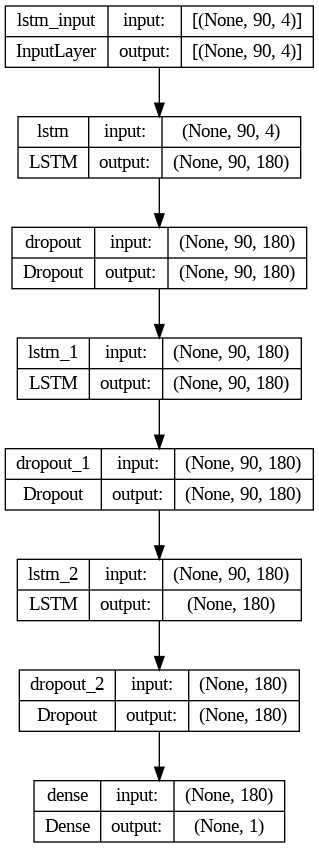

In [14]:
dias_anteriores = 90
caminho_pesos = "/content/drive/My Drive/Colab Notebooks/JessAI_notebooks-dev/Weights/open_weights.h5"
log_dir = "/content/drive/My Drive/Colab Notebooks/JessAI_notebooks-dev/logs/model_open_logs"

model_open, callbacks = create_model(dias_anteriores, caminho_pesos, log_dir)
keras.utils.plot_model(model_open, show_shapes=True,)

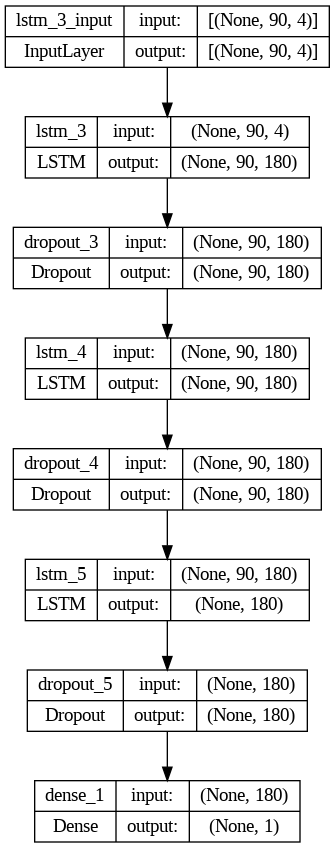

In [15]:
dias_anteriores = 90
caminho_pesos = "/content/drive/My Drive/Colab Notebooks/JessAI_notebooks-dev/Weights/high_weights.h5"
log_dir = "/content/drive/My Drive/Colab Notebooks/JessAI_notebooks-dev/logs/model_high_logs"

model_high, callbacks = create_model(dias_anteriores, caminho_pesos, log_dir)
keras.utils.plot_model(model_high, show_shapes=True,)

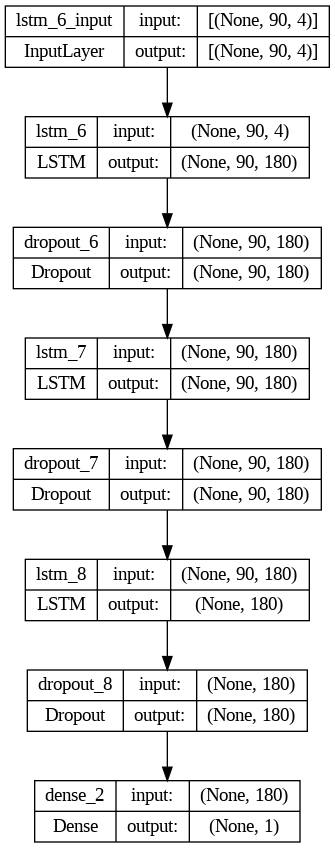

In [16]:
dias_anteriores = 90
caminho_pesos = "/content/drive/My Drive/Colab Notebooks/JessAI_notebooks-dev/Weights/low_weights.h5"
log_dir = "/content/drive/My Drive/Colab Notebooks/JessAI_notebooks-dev/logs/model_low_logs"

model_low, callbacks = create_model(dias_anteriores, caminho_pesos, log_dir)
keras.utils.plot_model(model_low, show_shapes=True,)

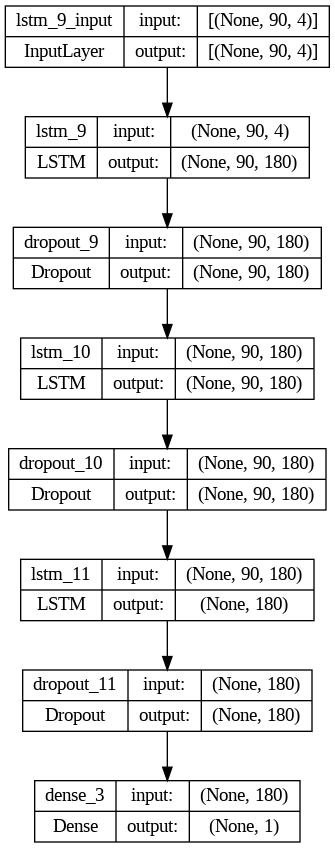

In [17]:
dias_anteriores = 90
caminho_pesos = "/content/drive/My Drive/Colab Notebooks/JessAI_notebooks-dev/Weights/close_weights.h5"
log_dir = "/content/drive/My Drive/Colab Notebooks/JessAI_notebooks-dev/logs/model_close_logs"

model_close, callbacks = create_model(dias_anteriores, caminho_pesos, log_dir)
keras.utils.plot_model(model_close, show_shapes=True,)

### **Treinamento** | **Train**
<details>
  <summary>Descrição</summary>
**PT -** Nesta etapa, o modelo RNN-LSTM é treinado com o conjunto de treinamento. O treinamento é realizado por 2000 épocas, utilizando um lote (batch) de tamanho 32. Uma validação de 20% dos dados é empregada durante o treinamento, ajudando a monitorar o desempenho do modelo em um conjunto não visto. Callbacks como ModelCheckpoint, TensorBoard e EarlyStopping são utilizados para salvar os melhores pesos, registrar informações para análise e interromper o treinamento antecipadamente, respectivamente. O progresso do treinamento é exibido com verbose=1.

---
**EN -** In this step, the RNN-LSTM model is trained with the training set. The training is conducted for 2000 epochs, using a batch size of 32. A validation split of 20% of the data is employed during training, helping to monitor the model's performance on an unseen set. Callbacks such as ModelCheckpoint, TensorBoard, and EarlyStopping are used to save the best weights, log information for analysis, and stop training early, respectively. The training progress is displayed with verbose=1.
</details>

In [21]:
model_open.fit(previsores_train, target_train[: , 0:1], epochs=2000, validation_split=0.2,batch_size=32, callbacks=callbacks, verbose=1)
model_open.save('/content/drive/My Drive/Colab Notebooks/JessAI_notebooks-dev/Models/model_open.keras')

In [ ]:
model_high.fit(previsores_train, target_train[: , 1:2], epochs=2000, validation_split=0.2,batch_size=32, callbacks=callbacks, verbose=1)
model_high.save('/content/drive/My Drive/Colab Notebooks/JessAI_notebooks-dev/Models/model_high.keras')

Epoch 1/2000
 507/1530 [========>.....................] - ETA: 12:23 - loss: 0.0346

In [ ]:
model_low.fit(previsores_train, target_train[: , 2:3], epochs=2000, validation_split=0.2,batch_size=32, callbacks=callbacks, verbose=1)
model_low.save('/content/drive/My Drive/Colab Notebooks/JessAI_notebooks-dev/Models/model_low.keras')

In [ ]:
model_close.fit(previsores_train, target_train[: , 3:4], epochs=2000, validation_split=0.2,batch_size=32, callbacks=callbacks, verbose=1)
model_close.save('/content/drive/My Drive/Colab Notebooks/JessAI_notebooks-dev/Models/model_close.keras')

### **Teste da Rede** | **Network Testing**
<details>
  <summary>Descrição</summary>
**PT -** Nesta fase, o modelo treinado é carregado a partir dos pesos salvos anteriormente. O desempenho do modelo é avaliado utilizando o conjunto de teste, e a perda (loss) obtida é impressa. Além disso, são geradas previsões (`previsoes`) para o conjunto de teste, e um gráfico é plotado para comparar as previsões com os valores reais. Por fim, o TensorBoard é carregado para visualização interativa dos registros de treinamento e o modelo é salvo com o nome 'JessIA.keras'.

---
**EN -** In this phase, the trained model is loaded from the previously saved weights. The model's performance is evaluated using the test set, and the obtained loss is printed. Additionally, predictions (`previsoes`) are generated for the test set, and a plot is created to compare predictions with actual values. Finally, TensorBoard is loaded for interactive visualization of training logs, and the model is saved with the name 'JessIA.keras'.
</details>

In [ ]:
# Carregar os modelos salvos
model_open = keras.models.load_model('/content/drive/My Drive/JessIA_notebooks-dev/Models/model_open.keras')
model_high = keras.models.load_model('/content/drive/My Drive/JessIA_notebooks-dev/Models/model_high.keras')
model_low = keras.models.load_model('/content/drive/My Drive/JessIA_notebooks-dev/Models/model_low.keras')
model_close = keras.models.load_model('/content/drive/My Drive/JessIA_notebooks-dev/Models/model_close.keras')

# Avaliar o modelo e imprimir a perda nos dados de teste
test_loss_open = model_open.evaluate(previsores_test[:, 0:1], target_test[:, 0:1])
test_loss_high = model_high.evaluate(previsores_test[:, 1:2], target_test[:, 1:2])
test_loss_low = model_low.evaluate(previsores_test[:, 2:3], target_test[:, 2:3])
test_loss_close = model_close.evaluate(previsores_test[:, 3:4], target_test[:, 3:4])

print("Test loss Open", test_loss_open)
print("Test loss High", test_loss_high)
print("Test loss Low", test_loss_low)
print("Test loss Close", test_loss_close)

# Previsões usando os modelos
previsao_open = model_open.predict(previsores_test)
previsao_high = model_high.predict(previsores_test)
previsao_low = model_low.predict(previsores_test)
previsao_close = model_close.predict(previsores_test)

# Plotar os resultados
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
plt.plot(previsao_open[:, 0], 'r', label='Predicted Open')
plt.plot(target_test[:, 0], 'g', label='Original Open')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(previsao_high[:, 0], 'r', label='Predicted High')
plt.plot(target_test[:, 1], 'g', label='Original High')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(previsao_low[:, 0], 'r', label='Predicted Low')
plt.plot(target_test[:, 2], 'g', label='Original Low')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(previsao_close[:, 0], 'r', label='Predicted Close')
plt.plot(target_test[:, 3], 'g', label='Original Close')
plt.legend()

plt.show()

## #TODO

In [ ]:
model = keras.models.load_model("/content/drive/My Drive/JessIA.keras")
test_loss = model.evaluate(previsores_test, target_test)
print("Test loss", test_loss)

In [ ]:
previsão = model.predict(previsores_test)

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(previsoes[:, 0], 'r', label = 'Predicted Close')
plt.plot(preco_real_test[:], 'g', label = 'Original Close')
plt.legend()
plt.show()

In [ ]:
%load_ext tensorboard
%tensorboard --logdir '/content/drive/My Drive/logs'

In [ ]:
#modelo.save('/content/drive/My Drive/JessIA.keras')

In [ ]:
d90_a = previsores_test[0:1]

In [ ]:
valores_gerados = [d90_a[0:]]
for i in range(5):
  valendo = model.predict(d90_a)
  valores_gerados.append(valendo)

In [ ]:
valores_gerados